In [57]:
import numpy as np
import pandas as pd
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', FutureWarning)

from matplotlib.lines import Line2D


In [60]:
# Data taken from https://www.kaggle.com/dansbecker/nba-shot-logs
df = pd.read_csv('shot_logs.csv')

In [44]:
df.tail(3)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
128066,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10,23.0,2,...,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,8,4,2:37,9.1,4,...,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127
128068,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,9,4,0:12,NaN,5,...,5.1,2,made,"Bradley, Avery",202340,2.3,1,2,jarrett jack,101127


In [45]:
# SHOT CLOCK

In [46]:
df_sc = df[["SHOT_CLOCK", "SHOT_RESULT"]].dropna()
df_sc.head(5)

,SHOT_CLOCK,SHOT_RESULT
0,10.8,made
1,3.4,missed
3,10.3,missed
4,10.9,missed
5,9.1,missed


In [47]:
#General function for calculating make probability within range
def calc_sc_prob_in_range(made_df, missed_df, low, high):
    success = len(made_df[(made_df['SHOT_CLOCK'] >= low) & (made_df['SHOT_CLOCK'] < high)])
    total = success + len(missed_df[(missed_df['SHOT_CLOCK'] >= low) & (missed_df['SHOT_CLOCK'] < high)])
    return success/total

#General function for getting the array of probabilities
def make_probs(func, made_arr, missed_arr):
    m_probs = make_array()
    for a in range(12):
        m_probs = np.append(m_probs, func(made_arr, missed_arr, 2*a, 2*a+2))
    return m_probs

Text(0, 0.5, 'Make Probability')

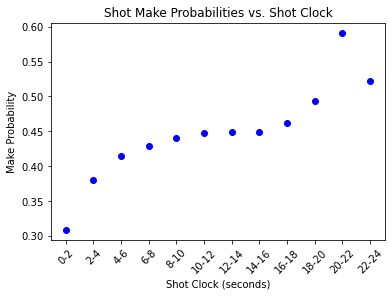

In [48]:
# This cell makes a plot of the shot probabilities by time on shot clock
made = df_sc[df_sc['SHOT_RESULT']=='made']
missed = df_sc[df_sc['SHOT_RESULT']=='missed']
general_shotclock_make_probs = make_probs(calc_sc_prob_in_range, made, missed)
shotclock_ranges = make_array("0-2", "2-4", "4-6", "6-8", "8-10", "10-12", "12-14", "14-16", "16-18", "18-20", "20-22", "22-24")
plt.plot(shotclock_ranges, general_shotclock_make_probs, 'bo')
plt.xticks(rotation=45)
plt.title("Shot Make Probabilities vs. Shot Clock")
plt.xlabel("Shot Clock (seconds)")
plt.ylabel("Make Probability")

In [49]:
df_sc_with_period = df[["SHOT_CLOCK", "PERIOD", "SHOT_RESULT"]].dropna()
df_sc_with_period.head(5)

,SHOT_CLOCK,PERIOD,SHOT_RESULT
0,10.8,1,made
1,3.4,1,missed
3,10.3,2,missed
4,10.9,2,missed
5,9.1,2,missed


In [50]:
#Functions to get the dataframes by quarter

def made_by_quarter(quarter):
    return df_sc_with_period[(df_sc_with_period['SHOT_RESULT']=='made') & (df_sc_with_period['PERIOD']==quarter)]
def missed_by_quarter(quarter):
    return df_sc_with_period[(df_sc_with_period['SHOT_RESULT']=='missed') & (df_sc_with_period['PERIOD']==quarter)]
made_q1 = made_by_quarter(1)
made_q2 = made_by_quarter(2)
made_q3 = made_by_quarter(3)
made_q4 = made_by_quarter(4)
missed_q1 = missed_by_quarter(1)
missed_q2 = missed_by_quarter(2)
missed_q3 = missed_by_quarter(3)
missed_q4 = missed_by_quarter(4)

In [51]:
#Generate arrays for the make probs by quarter
q1_sc_make_probs = make_probs(calc_sc_prob_in_range, made_q1, missed_q1)
q2_sc_make_probs = make_probs(calc_sc_prob_in_range, made_q2, missed_q2)
q3_sc_make_probs = make_probs(calc_sc_prob_in_range, made_q3, missed_q3)
q4_sc_make_probs = make_probs(calc_sc_prob_in_range, made_q4, missed_q4)

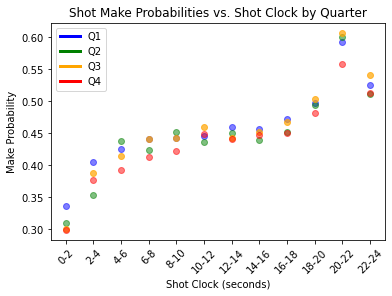

In [52]:
plt.plot(shotclock_ranges, q1_sc_make_probs, 'bo', alpha=0.5)
plt.plot(q2_sc_make_probs, 'go', alpha=0.5)
plt.plot(q3_sc_make_probs, 'o', color='orange', alpha=0.7)
plt.plot(q4_sc_make_probs, 'ro', alpha=0.5)
plt.xticks(rotation=45)
plt.title("Shot Make Probabilities vs. Shot Clock by Quarter")
plt.xlabel("Shot Clock (seconds)")
plt.ylabel("Make Probability")
custom_lines = [Line2D([0], [0], color='blue', lw=3),
                Line2D([0], [0], color='green', lw=3),
                Line2D([0], [0], color='orange', lw=3),
                Line2D([0], [0], color='red', lw=3)]
plt.legend(custom_lines, ["Q1", "Q2", "Q3", "Q4"])

In [53]:
df_sc_dist = df[["SHOT_CLOCK", "SHOT_DIST", "SHOT_RESULT"]].dropna()
df_sc_dist.head(5)

,SHOT_CLOCK,SHOT_DIST,SHOT_RESULT
0,10.8,7.7,made
1,3.4,28.2,missed
3,10.3,17.2,missed
4,10.9,3.7,missed
5,9.1,18.4,missed


In [59]:
vals = []
for a in range(len(df_sc_dist)):
    if ((df_sc_dist.iloc[a]["SHOT_CLOCK"] < 20) | (df_sc_dist.iloc[a]["SHOT_CLOCK"] >= 22)):
        vals.append("Between 20 and 22 Seconds")
    else:
        vals.append("Not Between 20 and 22 Seconds")

In [55]:
df_sc_dist.insert(3, "Label", vals)

array([<AxesSubplot:title={'center':'False'}>,
       <AxesSubplot:title={'center':'True'}>], dtype=object)

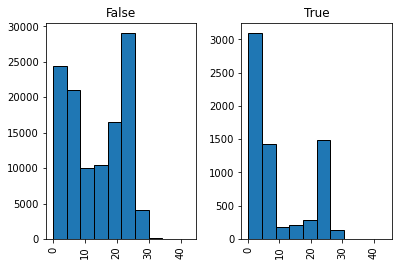

In [58]:
df_sc_dist.hist("SHOT_DIST", by="Label")

Most of the shots taken during the shot clock interval 20 <= shotclock < 22 are taken up close to the basket. This is probably the reason that the make probability is highest during this interval. Most of these shots were probably either breakaway layups or shots that were taken off of rebounds. During the breakaway case, players are most likely to drive to the basket for a layup - the highest probability shot. During the rebound case, players are likely to either shoot the ball nearly immediately after the rebound or pass it to an outside player that is set up for a three point shot (hence the spike around 24 ft distance from basket). 